# Implementation of Support vector regression algorithm using python

Prepared by : Swaminathan Ayyappan 

Email : swamynathanayyappan@gmail.com

LinkedIn : linkedin.com/in/swaminathan-ayyappan-60b685175/

Problem description :

           You have been provided with an dataset that contains employees salary based on their level,consider that an a very famous Multinational corporation has been appointed you as a data scientist in this scenario if that company is  hiring an experienced employee to their concern, he/she is saying that they had been given $160k+ as their salary with  an experience of 6 years in their past working company , such that your company is raising a question that to verify    that the new recruited employee is telling truth or bluff.

And the data set contains :

i)Position - Working position of the employee.

ii)Level - Their working level based on their position.

iii)Salary - Their respective salary based upon their level

The dataset for this project is already posted on the github repository..

In [1]:
"""
i)Pandas - Used for handling dataset.

ii)numpy - stands for numerical python to handle arrays.

iii)matplotlib - To visualize our dataset and here 'pyplot' refers to making of statistical plots.

iv)seaborn - Advanced visualization library than matplotlib helps to visualize the dataset.

Note :

The %matplotlib inline helps to visualize the plots within the notebook itself.

"""
#Importing libraries like pandas,numpy,matplotlib and seaborn and their explanations are given above.
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline  

In [2]:
#Importing the salary position dataset into a single variable salary_pos with the help of pandas library.
salary_pos=pd.read_csv('F:/STUDY MATERIALS/[FreeCourseSite.com] Udemy - Machine Learning A-Z™ Hands-On Python & R In Data Science/Datasets/Machine Learning A-Z New/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv')

# Exploratory Data Analysis (EDA): 

In [3]:
#Viewing the first five entries of the salary_pos dataset.
salary_pos.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#provides entire information of salary_pos dataset.
salary_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
#given entire description of the numerical values of the salary_pos dataset.
salary_pos.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
#Viewing the last five entries of the salary_pos dataset.
salary_pos.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
#Displaying the column names / attributes in the salary_pos dataset 
salary_pos.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [8]:
#To know about the number of rows and columns in the salary_pos dataset 
salary_pos.shape

(10, 3)

In [9]:
#To verify any null values present in the salary_pos dataset 
salary_pos.isna().any()

Position    False
Level       False
Salary      False
dtype: bool

In [10]:
#To know about the each value's presence in the particular column (Position) of the salary_pos dataset.
salary_pos['Position'].value_counts()

Senior Partner       1
Manager              1
Region Manager       1
Business Analyst     1
Country Manager      1
Partner              1
Junior Consultant    1
CEO                  1
C-level              1
Senior Consultant    1
Name: Position, dtype: int64

In [11]:
#To know about the each value's presence in the particular column (Position) of the salary_pos dataset.
salary_pos['Level'].value_counts()

10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
Name: Level, dtype: int64

In [12]:
#To know about the each value's presence in the particular column (Position) of the salary_pos dataset.
salary_pos['Salary'].value_counts()

150000     1
60000      1
300000     1
200000     1
45000      1
110000     1
500000     1
1000000    1
80000      1
50000      1
Name: Salary, dtype: int64

In [13]:
#To understand about the correlation between each attributes in the salary_pos dataset.
salary_pos.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


# Data visualization

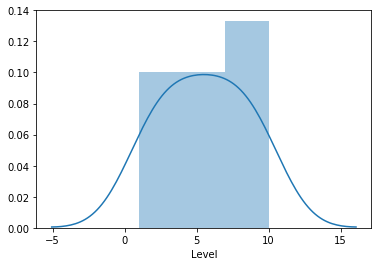

In [14]:
#To create a ditance plot of the Level column in the salary_pos dataset
sns.distplot(salary_pos['Level'])
plt.show()

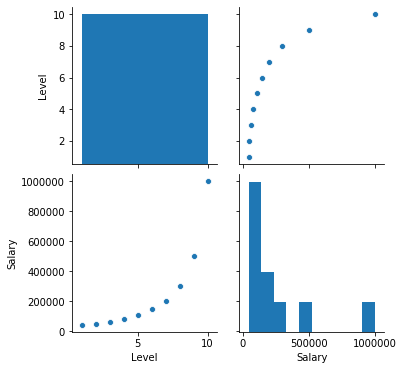

In [15]:
#To create a pair plot of the every numerical values in the salary_pos dataset
sns.pairplot(salary_pos)
plt.show()

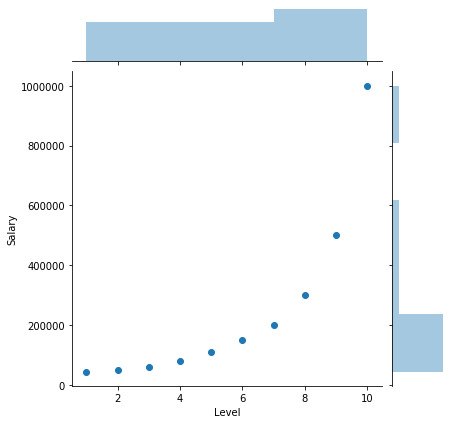

In [16]:
#Creates a joint plot for the attributes Level and salary present in the salary_pos dataset.
sns.jointplot('Level','Salary',data=salary_pos)
plt.show()

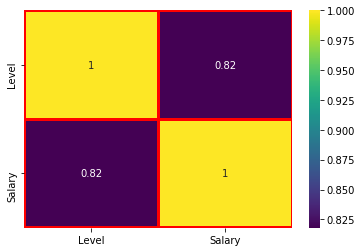

In [17]:
#To visualize the correlation of the attributes present inside the salary_pos dataset using a heatmap.
sns.heatmap(salary_pos.corr(),cmap='viridis',annot=True,linewidth=2,linecolor='red')
plt.show()

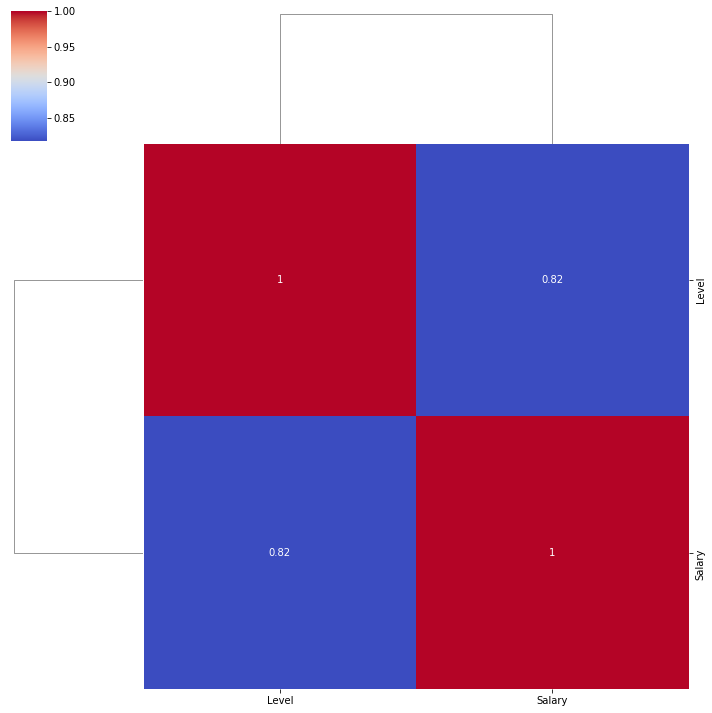

In [18]:
#To visualize the correlation of the attributes present inside the salary dataset using a clustermap.
sns.clustermap(salary_pos.corr(),cmap='coolwarm',annot=True)
plt.show()

# Dependent and Independent variable allocation

Inorder to execute Machine learning algorithm we want to seperate the dependent and independent values in the dataset

where,

X->Independent variable

y->Dependent variable

So in our datset the 'Salary' is purely dependent on the 'Level' so in this case we need to allocate Level for X variable and Salary for y variable.

In [19]:
X=salary_pos[['Level']] # 2 Dimensional array that holds the values of Level from the dataset.
y=salary_pos[['Salary']]# 2 Dimensional array that holds the values of Salary from the dataset.

In [20]:
#Reviewing the X variable after allocation
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [21]:
#Reviewing the X variable after allocation
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


Here we are not having the necessity of doing train test split since our problem lies within the datapoints itself , it is sufficient to proceed without any train and test split.

# Importing support vector regression class from scikit learn

In [22]:
#Importing support vector regression (SVR) class from scikit learn(Sklearn) library under svm package.  
from sklearn.svm import SVR

In [23]:
#instantiate our model (Creating an object for the Support vector regression class) and choosing the kernel as gaussian (rbf).
svr_reg=SVR(kernel='rbf')

# Training our model with the dataset

In [24]:
#Training/Fitting our datapoints to our svr model.
svr_reg.fit(X,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
#Printing the predicted results of support vector regression before feature scaling.
print('The employee salary in the previous company for 6.5 years of experience predicted using SVR before feature scaling is : $')
print(float(svr_reg.predict([[6.5]]))) #Printing the predicted results using our trained svr model.

The employee salary in the previous company for 6.5 years of experience predicted using SVR before feature scaling is : $
130001.82883924115


From this we assume that the employee is bluffing regarding his/her salary that they had got in their previous company but the actual results will be followed hereby

In [26]:
#Assigning our predicted variables before standard scaling to y_pred variable.
y_pred=svr_reg.predict(X)

# Visualization before Feature scaling

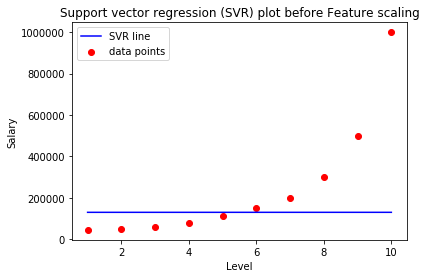

In [27]:
plt.scatter(X,y,color='red',label='data points') #Creates a scatter plot of our datapoints. 
plt.plot(X,y_pred,color='blue',label='SVR line')#Creates a line plot of our training dataset with our predicted values. 
plt.title('Support vector regression (SVR) plot before Feature scaling') #Gives title to our plot.
plt.xlabel('Level')#Gives title to 'X Axis'.
plt.ylabel('Salary')#Gives title to 'Y Axis'.
plt.legend()#Displays legend in the plot.
plt.show()#Helps to visualize within the notebook itself.

# Applying Feature Scaling

In [28]:
#Importing StandardScaler class from scikit learn (sklearn) library under preprocessing library.
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler() #Instantiating sc_x object for performing feature scaling of the independent variable.
sc_y=StandardScaler() #Instantiating sc_y object for performing feature scaling of the dependent variable.
X=sc_x.fit_transform(X) #Assigning the transformed feature scaled values to the independent variable.
y=sc_y.fit_transform(y) #Assigning the transformed feature scaled values to the independent variable

In [29]:
#Instantiting our Support Vector Regressor (svr2_reg) with a gaussian kernel (rbf).
svr2_reg=SVR(kernel='rbf')

In [30]:
#Fitting/Training our svr2_reg model with the featured scaled datapoints.
svr2_reg.fit(X,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
#Assigning the predicted feature scaled values from svr2_reg model to y_pred_reg2 variable.
y_pred_reg2=svr2_reg.predict(X)

In [32]:
#Printing the predicted results of support vector regressor (svr) after feature scaling. 
print('The employee salary in the previous company for 6.5 years of experience predicted using SVR is : $',float(sc_y.inverse_transform(svr2_reg.predict(sc_x.transform(np.array([[6.5]]))))))

The employee salary in the previous company for 6.5 years of experience predicted using SVR is : $ 170370.02040650236


Thus we come to a conclusion that the employee is true about his past salary which he/she had received from their past company.

# Visualizing the results after feature scaling

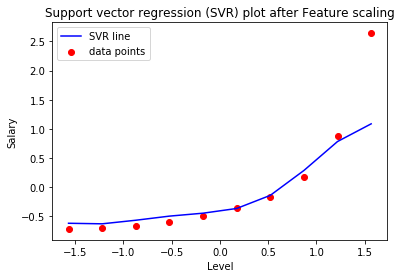

In [33]:
plt.scatter(X,y,color='red',label='data points') #Creates a scatter plot of our datapoints.
plt.plot(X,y_pred_reg2,color='blue',label='SVR line') #Creates a line plot of our training dataset with our predicted values after feature scaling. 
plt.title('Support vector regression (SVR) plot after Feature scaling')  #Gives title to our plot.
plt.xlabel('Level') #Gives title to 'X Axis'.
plt.ylabel('Salary') #Gives title to 'Y Axis'.
plt.legend() #Displays legend in the plot.
plt.show() #Helps to visualize within the notebook itself.

# Model's accuracy / Performance 

Accuracy for the model before feature scaling

i)Using score method

In [34]:
#Prints the score of the svr regressor model before feature scaling. 
print('Accuracy of the SVR regressor model before feature scaled model : ',svr_reg.score(X,y)*100)

Accuracy of the SVR regressor model before feature scaled model :  -1689947206256.7302


In [35]:
#Using Evaluation metrics like MAE,MSE,RMSE 
#Importing mean_absolute_error (MAE) , Mean_squared_error (MSE) class from scikit learn library under metrics package.
from sklearn.metrics import mean_absolute_error,mean_squared_error

ii)Mean absolute error (MAE) :

In [36]:
#Prints the mean absolute error (MAE) of the svr regressor model before feature scaling.
print(mean_absolute_error(y_pred,y))

130000.0


iii)Mean squared error (MSE):

In [37]:
#Prints the mean squared error (MSE) of the svr regressor model before feature scaling.
print(mean_squared_error(y_pred,y))

16900000005.162525


iv)Root mean squared error (RMSE):

In [38]:
#Prints the Root mean squared error (RMSE) of the svr regressor model before feature scaling.
print(np.sqrt(mean_squared_error(y_pred,y)))

130000.00001985587


Computing the feature scaled model perfomance:

i)Using score method :

In [39]:
#Prints the score of the svr regressor model before feature scaling. 
print('Accuracy of the SVR regressor model before feature scaled model : ',svr2_reg.score(X,y)*100)

Accuracy of the SVR regressor model before feature scaled model :  75.16001070620798


ii)Mean absolute error (MAE):

In [40]:
#Prints the mean absolute error (MAE) of the svr regressor model after feature scaling.
print(mean_absolute_error(y_pred_reg2,y))

0.22299274095734414


iii)Mean Squared error (MSE):

In [41]:
#Prints the mean squared error (MSE) of the svr regressor model after feature scaling.
print(mean_squared_error(y_pred_reg2,y))

0.24839989293792014


iv)Root Mean Squared error (RMSE):

In [42]:
#Prints the Root mean squared error (RMSE) of the svr regressor model after feature scaling.
print(np.sqrt(mean_squared_error(y_pred_reg2,y)))

0.4983973243687411


And we can able to see that our feature scaled model has better accuracy for making predictions.